## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bikeshare (1).csv to bikeshare (1).csv


In [54]:
df = pd.read_csv("bikeshare (1).csv")
del df['datetime']

In [16]:
# df = pd.read_csv("bikeshare (1).csv")
# print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

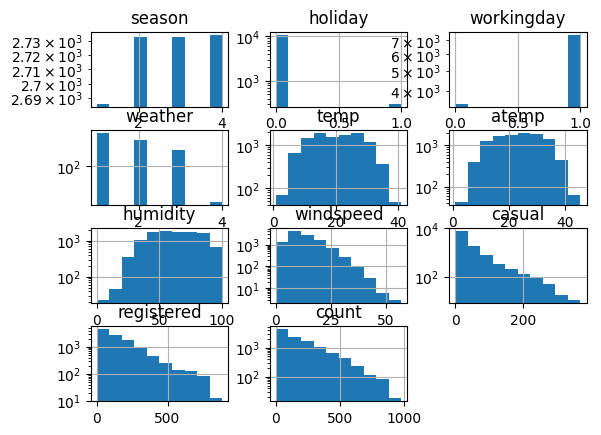

In [8]:
df.hist(log=True)

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [10]:
df.mode()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,4,0,1,1,14.76,31.06,88,0.0,0,3,5


In [11]:
df.var()

,0
season,1.245845
holiday,0.027755
workingday,0.217304
weather,0.401751
temp,60.708872
atemp,71.818856
humidity,370.371306
windspeed,66.659670
casual,2496.049219
registered,22812.789514


In [12]:
df.quantile([0.50, 0.75, 0.99])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0.50,3.0,0.0,1.0,1.0,20.50,24.24,62.0,12.9980,17.00,118.0,145.00
0.75,4.0,0.0,1.0,2.0,26.24,31.06,77.0,16.9979,49.00,222.0,284.00
0.99,4.0,1.0,1.0,3.0,36.08,40.15,100.0,35.0008,240.15,697.0,774.15


In [13]:
df.describe([0.50, 0.75, 0.99])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
99%,4.000000,1.000000,1.000000,3.000000,36.08000,40.150000,100.000000,35.000800,240.150000,697.000000,774.150000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Выводы: основные пользователи сервиса проката велосипедов - зарегистрированные. В рабочие дни данные услуги более популярны, чем в выходные. Высокое влияние погодных явлений и сезонного фактора (температуры, температуры по ощущениям, влажности, скорости ветра).


### 3. (*)
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [14]:
df.skew()

,0
season,-0.007076
holiday,5.660517
workingday,-0.776163
weather,1.243484
temp,0.003691
atemp,-0.102560
humidity,-0.086335
windspeed,0.588767
casual,2.495748
registered,1.524805


In [15]:
df.kurtosis()

,0
season,-1.355661
holiday,30.046975
workingday,-1.397828
weather,0.395533
temp,-0.914530
atemp,-0.850076
humidity,-0.759818
windspeed,0.630133
casual,7.551629
registered,2.626081


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95.

In [60]:
max_var_column = 'atemp'

def my_norm_confidence(df=df, column=max_var_column, alpha=0.95):
    interval = stats.norm.interval(0.95, df[max_var_column].mean(), df[max_var_column].std())
    return interval
confidence = my_norm_confidence()
print(confidence)

(np.float64(7.045172041641042), np.float64(40.26499606418295))


Text(0.5, 1.0, 'Доверительный интервал')

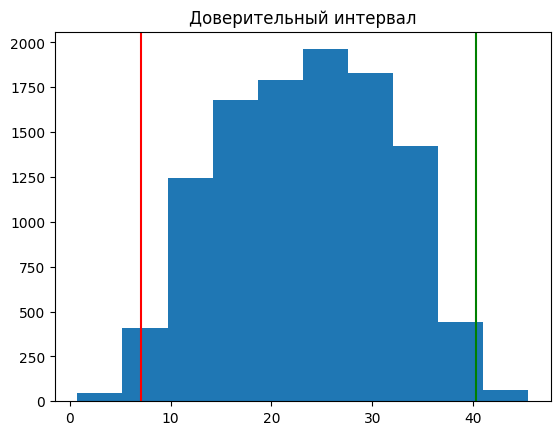

In [61]:
# df.max_var_column.plot()
plt.hist(df[max_var_column])
plt.axvline(x=confidence[0], color="r", linestyle="-")
plt.axvline(x=confidence[1], color="g", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [63]:
for column in df:
  upper_level = df[column].mean() + 3 * df[column].std()
  lower_level = df[column].mean() - 3 * df[column].std()
  count = ((df[column] < lower_level) | (df[column] > upper_level)).sum()

  print(f"Количество значений за границами метрики {column} ±3 сигмы: {count}")

Количество значений за границами метрики season ±3 сигмы: 0
Количество значений за границами метрики holiday ±3 сигмы: 311
Количество значений за границами метрики workingday ±3 сигмы: 0
Количество значений за границами метрики weather ±3 сигмы: 1
Количество значений за границами метрики temp ±3 сигмы: 0
Количество значений за границами метрики atemp ±3 сигмы: 0
Количество значений за границами метрики humidity ±3 сигмы: 22
Количество значений за границами метрики windspeed ±3 сигмы: 67
Количество значений за границами метрики casual ±3 сигмы: 292
Количество значений за границами метрики registered ±3 сигмы: 235
Количество значений за границами метрики count ±3 сигмы: 147


In [47]:
# df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Больше всего аномалий у метрики holiday - 311.

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [27]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
print(df.dtypes) #проверяю типы данных в DataFrame, т.к. выходит ошибка

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [32]:
corr_m = df.drop(columns=['datetime']).corr() #удаляем нечисловой столбец (с датой), т.к. corr работает только с числовыми
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [29]:
# corr_m = df.corr()
# corr_m

ValueError: could not convert string to float: '2011-01-01 00:00:00'

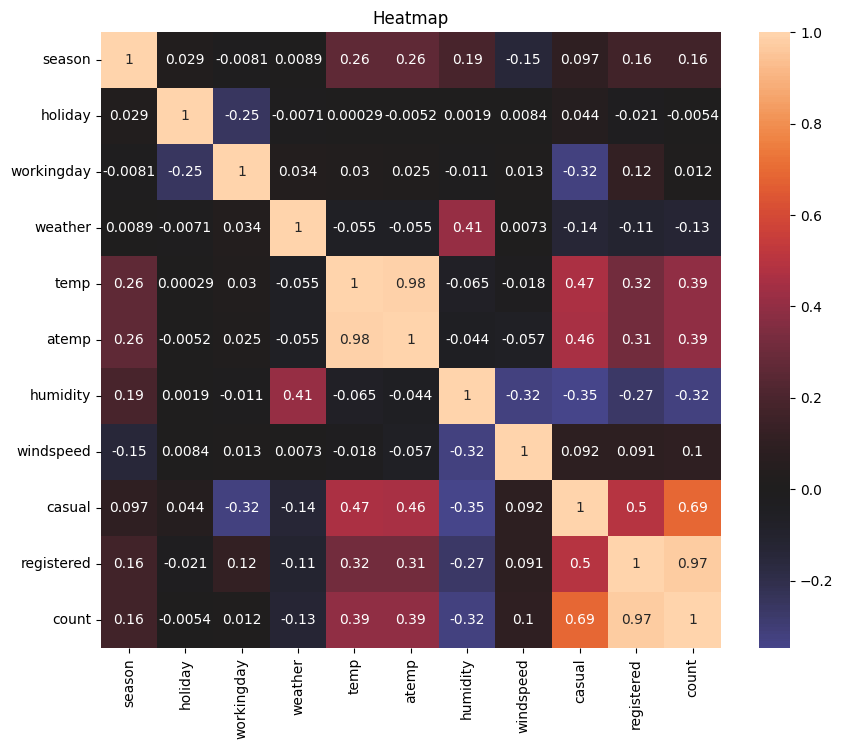

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_m, annot=True, center=0)
plt.title('Heatmap')
plt.show()

Выводы:
Температура и температура по ощущениям (atemp) демонстрируют  корреляцию почти в 1 (0.98, 0.98) - это равнонаправленные взаимновлияющие друг на друга факторы.

Количество зарегистрированных клиентов и количество услуг по аренде (count) тоже имеют высокую корреляцию (0.97, 0.97), в отличие от случайных клиентов (casual), чье влияние на количество оказанных услуг меньше (0.69).

Незарегистрированные клиенты (casual) имеют слабую отрицательную корреляцию с рабочими днями (workingday)(−0.32 −0.32) - непостоянные пользователи редко арендуют велосипеды в рабочие дни.

В выходные услуги по аренде не пользуются спросом, поэтому и сезонный и погодные факторы имеют с показателем holiday слабую корреляцию.
